**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 6 - Linear Regression**</font>

# Libraries

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [6]:
import statsmodels.api as sm

In [7]:
np.random.seed(1234)

In [8]:
import scipy.stats as stats

# Load Dataset

In [10]:
df = pd.read_csv('../DatasetsLabs/heart_failure_clinical_records_dataset_smhd.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [11]:
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Simple Linear Regression

Let's look at the scatterplot of bmi and ejection fraction

In [12]:
TARGET = 'bmi'

/var/folders/_y/h277wkdd5pn6k7_rv_nqy3yw0000gn/T/ipykernel_19936/3868311146.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="ejection_fraction", y="bmi", palette="muted", height=6, data=df)


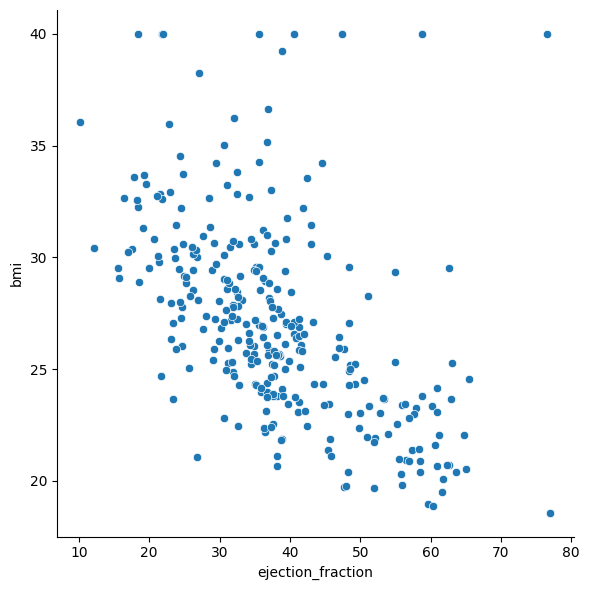

In [13]:
sns.relplot(x="ejection_fraction", y="bmi", palette="muted", height=6, data=df)

It looks like there is a relationship between them: we can try to predict BMI based on ejection fraction

In [14]:
X = df['ejection_fraction'].values.reshape(-1,1) #da un array 1d ad uno 2d con una colonna
y = df['bmi']
y.shape, X.shape

((299,), (299, 1))

In [15]:
X_const = sm.add_constant(X)

In [16]:
X_const.shape, y.shape, type(X_const)

((299, 2), (299,), numpy.ndarray)

$$ bmi = \beta_0 + \beta_1 \cdot ef + \epsilon $$

In [17]:
model = sm.OLS(y, X_const)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           3.06e-23
Time:                        15:37:41   Log-Likelihood:                -821.26
No. Observations:                 299   AIC:                             1647.
Df Residuals:                     297   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5154      0.717     48.117      0.0

In [18]:
y_pred = results.predict(X_const)

r2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2829
MSE: 14.2321


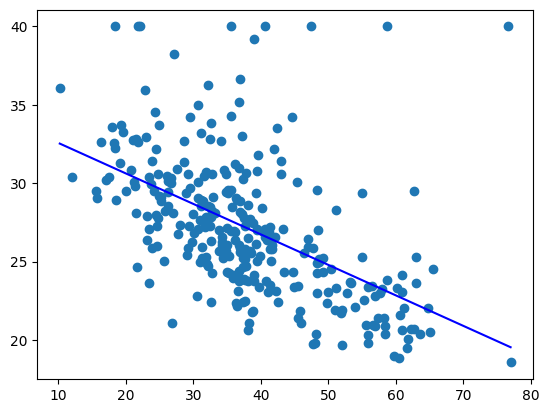

In [19]:
X_plot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
X_plot = sm.add_constant(X_plot)
y_plot = results.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot[:,1], y_plot, c='blue')

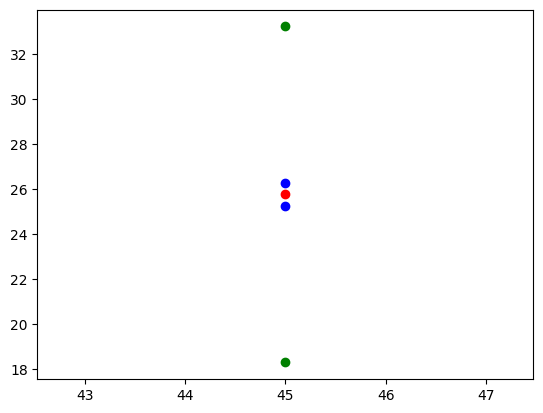

In [20]:
ef_point = 45
X0_const = np.array([1, ef_point])
prediction = results.get_prediction(X0_const) #ritorna una oggetto di una classe
intervals = prediction.summary_frame(alpha=0.05)
intervals
prediction = intervals['mean']
ci_lower = intervals['mean_ci_lower']
ci_upper = intervals['mean_ci_upper']
pi_lower = intervals['obs_ci_lower']
pi_upper = intervals['obs_ci_upper']

#plotting
plt.scatter(X0_const[1], prediction, c='red')
plt.scatter(X0_const[1], ci_lower, c='blue')
plt.scatter(X0_const[1], ci_upper, c='blue')
plt.scatter(X0_const[1], pi_lower, c='green')
plt.scatter(X0_const[1], pi_upper, c='green')
plt.show()

## Confidence/Prediction intervals

In [21]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_const = sm.add_constant(X_plot)

# Predict with confidence intervals
predictions = results.get_prediction(X_plot_const)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% intervals
summary_frame


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,32.53,0.55,31.46,33.60,25.00,40.06
1,32.40,0.53,31.35,33.45,24.88,39.92
2,32.27,0.52,31.24,33.30,24.75,39.79
3,32.14,0.51,31.13,33.15,24.62,39.65
4,32.01,0.50,31.02,32.99,24.49,39.52
...,...,...,...,...,...,...
95,20.06,0.69,18.71,21.42,12.49,27.64
96,19.93,0.70,18.56,21.31,12.36,27.51
97,19.80,0.71,18.40,21.20,12.22,27.38
98,19.67,0.72,18.25,21.09,12.09,27.25


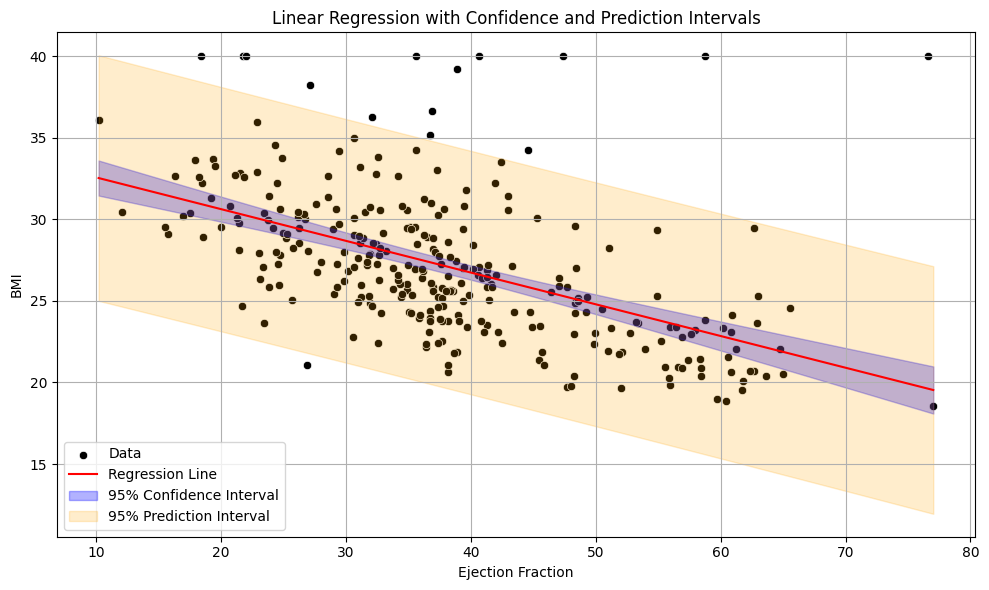

In [22]:
# Extract the values
y_pred = summary_frame['mean']
ci_lower = summary_frame['mean_ci_lower']
ci_upper = summary_frame['mean_ci_upper']
pi_lower = summary_frame['obs_ci_lower']
pi_upper = summary_frame['obs_ci_upper']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ejection_fraction'], y=df['bmi'], label='Data', color='black')
plt.plot(X_plot, y_pred, color='red', label='Regression Line')
plt.fill_between(X_plot.flatten(), ci_lower, ci_upper, color='blue', alpha=0.3, label='95% Confidence Interval')
plt.fill_between(X_plot.flatten(), pi_lower, pi_upper, color='orange', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('Ejection Fraction')
plt.ylabel('BMI')
plt.title('Linear Regression with Confidence and Prediction Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
x_mean = X.mean()
idx_closest = np.argmin(np.abs(X_plot.flatten() - x_mean))

ci_width_at_mean = ci_upper.iloc[idx_closest] - ci_lower.iloc[idx_closest]
pi_width_at_mean = pi_upper.iloc[idx_closest] - pi_lower.iloc[idx_closest]

print(f'CI width at mean(X) = {x_mean:.2f}: {ci_width_at_mean:.4f}')
print(f'PI width at mean(X) = {x_mean:.2f}: {pi_width_at_mean:.4f}')

print("CI width (start/end):", ci_upper.iloc[0] - ci_lower.iloc[0], ci_upper.iloc[-1] - ci_lower.iloc[-1])
print("PI width (start/end):", pi_upper.iloc[0] - pi_lower.iloc[0], pi_upper.iloc[-1] - pi_lower.iloc[-1])

CI width at mean(X) = 38.03: 0.8617
PI width at mean(X) = 38.03: 14.9234
CI width (start/end): 2.147469878187124 2.887852059701423
PI width (start/end): 15.05250862305327 15.175838642002418


Prediction and confidence intervals for a pecific point, ef=45

In [24]:
ef_point = 45
X_new = [1, ef_point] # Add constant manually

EF = 45
Predicted BMI: 25.77
95% Confidence Interval (mean): [25.27, 26.26]
95% Prediction Interval (new patient): [18.30, 33.23]


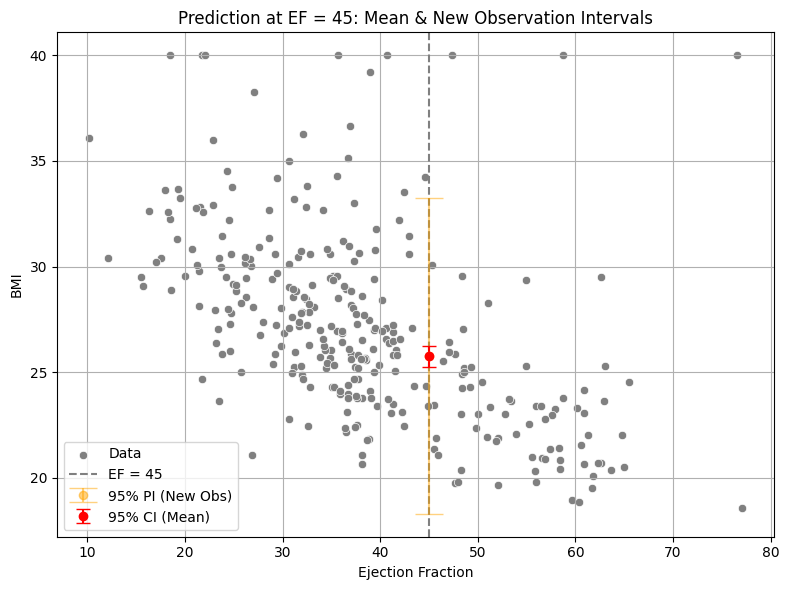

In [25]:
### TODO
ef_point = 45
X_new = np.array([[1, ef_point]])  # Add constant manually

# Get predictions with confidence and prediction intervals
pred_result = results.get_prediction(X_new)
pred_summary = pred_result.summary_frame(alpha=0.05)

# Extract predicted values and intervals
mean_pred = pred_summary['mean'].values[0]
ci_lower = pred_summary['mean_ci_lower'].values[0]
ci_upper = pred_summary['mean_ci_upper'].values[0]
pi_lower = pred_summary['obs_ci_lower'].values[0]
pi_upper = pred_summary['obs_ci_upper'].values[0]

print(f"EF = {ef_point}")
print(f"Predicted BMI: {mean_pred:.2f}")
print(f"95% Confidence Interval (mean): [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"95% Prediction Interval (new patient): [{pi_lower:.2f}, {pi_upper:.2f}]")

# --- Plot ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['ejection_fraction'], y=df['bmi'], label='Data', color='gray')
plt.axvline(x=ef_point, color='grey', linestyle='--', label=f'EF = {ef_point}')


# PI for new observation
plt.errorbar(ef_point, mean_pred,
             yerr=[[mean_pred - pi_lower], [pi_upper - mean_pred]],
             fmt='o', color='orange', capsize=10, alpha=0.5, label='95% PI (New Obs)')

# CI for mean
plt.errorbar(ef_point, mean_pred,
             yerr=[[mean_pred - ci_lower], [ci_upper - mean_pred]],
             fmt='o', color='red', capsize=5, label='95% CI (Mean)')

plt.xlabel('Ejection Fraction')
plt.ylabel('BMI')
plt.title(f'Prediction at EF = {ef_point}: Mean & New Observation Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Train-test set

So far we are evaluating the model on the same data it was trained on..

In [26]:
from sklearn import model_selection

X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'ejection_fraction', 'time']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)

train_index = X_train.index
test_index = X_test.index

In [27]:
### TODO: FIT THE MODEL ON TRAINING DATA
X_train_1 = X_train[['ejection_fraction']]
X_test_1 = X_test[['ejection_fraction']]
X_train_1 = sm.add_constant(X_train_1)
X_test_1 = sm.add_constant(X_test_1)

model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     91.11
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.76e-18
Time:                        15:38:19   Log-Likelihood:                -664.47
No. Observations:                 239   AIC:                             1333.
Df Residuals:                     237   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.7489      0.82

In [28]:
### TODO: COMPUTE MSE AND R^2 ON TEST DATA
y_pred = results.predict(X_test_1)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)
print(mse)

0.2995161534784553
10.382415897515164


# Multiple linear regression

## Multiple input variables

In [29]:
variables = num_vars.copy()
variables.remove('bmi')

X_train_2 = X_train[variables]
X_test_2 = X_test[variables]
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)

In [30]:
model = sm.OLS(y_train, X_train_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           5.01e-73
Time:                        15:39:20   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [31]:
y_pred = results.predict(X_test_2)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

n = len(y_test)
p = X_test_2.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757


$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}$$

$$ AdjR^2 = 1 - \frac{n - 1}{n - k -1} \frac{RSS}{TSS} = 1 - \frac{n - 1}{n - k -1} (1 - R^2)$$

where $k$ is the number of regressors

## Collinearity

The Variance Inflation Factor (VIF) indicates how good a variable can be predicted from the others

A high VIF means there is collinearity with some other variable

Rule of thumb: VIF > 5 for a variable is problematic

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = X_train_2

vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns

vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

                   Variable     VIF
0                     const 1158.00
1                       age    1.12
2  creatinine_phosphokinase    1.02
3         ejection_fraction    1.04
4                 platelets    1.02
5          serum_creatinine    1.07
6              serum_sodium    1.07
7                      time    1.07


The correlation coefficients can also identify collinearity, but not always. If a variable X1 is a linear transformation of a variable X2, their linear correlation coefficient will be high. But if the collinearity involves a group of variable, then it might not be evident from the correlation matrix

<Axes: >

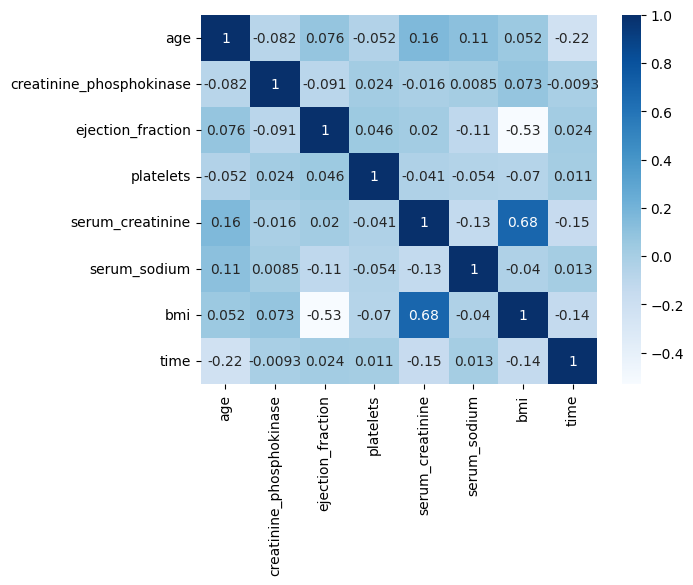

In [33]:
sns.heatmap(df[num_vars].corr(), cmap="Blues",annot=True)

## Scale variables

Numerical variables having different scales are often problematic. Many models have their coefficients' computation affected by this, but while this is not the case of linear regression with least square method, it is still useful to **standardize** the features for interpretability of coefficients and to reduce the condition numer when it is not due to a direct multicollinearity among the variables. The VIF is scale invariant, but the condition number is not.

Moreover, this is necessary when penalizations are introduced in linear regression models (more on this in the next lectures)

To standardize a variable x:

$$ z = \frac{x - \mu }{\sigma}$$

$$ $$

In [34]:
X_train_2 = X_train[variables]
X_test_2 = X_test[variables]

scaler = StandardScaler()
X_train_2_scaled = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns, index=X_train_2.index)
X_test_2_scaled = pd.DataFrame(scaler.transform(X_test_2), columns=X_test_2.columns, index=X_test_2.index)

X_train_2_scaled = sm.add_constant(X_train_2_scaled)
X_test_2_scaled = sm.add_constant(X_test_2_scaled)


In [35]:
model = sm.OLS(y_train, X_train_2_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           5.01e-73
Time:                        15:39:37   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
y_pred = results.predict(X_test_2_scaled)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_2_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757


## Reduce the number of variables

### EF + creatinine

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \epsilon $$

In [37]:
variables = ['ejection_fraction', 'serum_creatinine']

X_train_3 = X_train[variables]
X_test_3 = X_test[variables]
X_train_3 = sm.add_constant(X_train_3)
X_test_3 = sm.add_constant(X_test_3)

In [38]:
model = sm.OLS(y_train, X_train_3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     418.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           2.64e-78
Time:                        15:39:42   Log-Likelihood:                -522.44
No. Observations:                 239   AIC:                             1051.
Df Residuals:                     236   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.9120      0.48

In [39]:
y_pred = results.predict(X_test_3)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_3.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6279
adj_R2: 0.6080
MSE: 5.5148


with 2 regressors we can still visualize a plane:

In [40]:
# TODO
x1 = X_train_3['ejection_fraction']
x2 = X_train_3['serum_creatinine']
y = y_train

# Get model coefficients
b0, b1, b2 = results.params

# Create a grid for plotting the regression plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)
x2_grid.shape, y.shape,

((30, 30), (239,))

In [41]:
# Compute predicted y values over the grid
y_pred_grid = b0 + b1 * x1_grid + b2 * x2_grid
y_pred_grid.shape, b1, b0


((30, 30), -0.20615083151495278, 30.91195102560674)

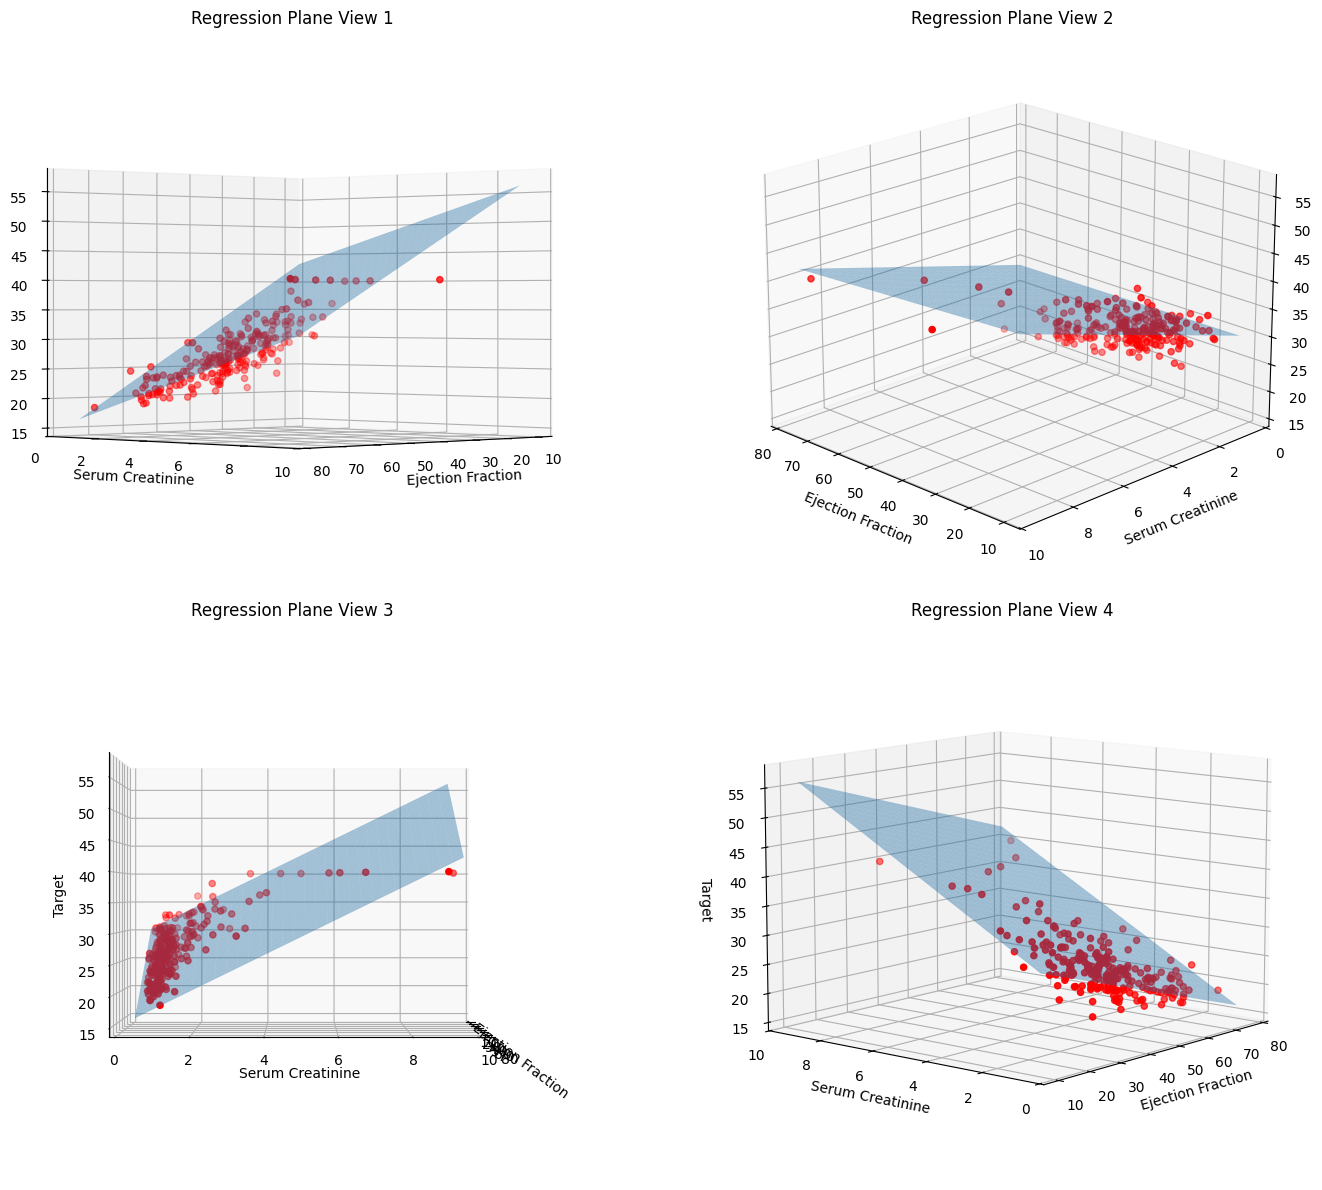

In [42]:
# Plot
fig = plt.figure(figsize=(16, 12))

views = [
    (0, 45),
    (20, 135),
    (0, 0),
    (10, 220)
]

titles = [
    "Regression Plane View 1",
    "Regression Plane View 2",
    "Regression Plane View 3",
    "Regression Plane View 4"
]

for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(x1, x2, y, color='r', label='Data')
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.4)
    ax.set_xlabel('Ejection Fraction')
    ax.set_ylabel('Serum Creatinine')
    ax.set_zlabel('Target')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

with standardization:

In [49]:
scaletor = StandardScaler()
X_train_scaled = scaletor.fit_transform(X_train[num_vars])
X_train_scaled #ci sta che i valori non siano compresi tra -1 e 1, hanno solo media 0 e deviazione standard 1

array([[-0.08143932,  3.24989938,  1.67557712, ...,  4.7725326 ,
        -1.13017853, -1.08270124],
       [-0.2482731 , -0.44847392,  0.41603855, ..., -0.39113013,
         0.13775787,  1.31541386],
       [ 1.16981403, -0.01416599, -0.57572966, ...,  0.34780781,
         1.36392383, -1.33918413],
       ...,
       [ 0.75272958, -0.50927703,  0.61631107, ..., -0.39113013,
        -0.21993936, -1.06987709],
       [ 0.08539446, -0.51699806, -0.01122356, ..., -0.30210146,
        -0.2769896 ,  1.82837965],
       [-0.91560821, -0.01416599,  1.99592918, ..., -0.56918747,
        -0.64333327,  0.82809635]], shape=(239, 7))

In [50]:
X_train_3 = X_train[variables]
X_test_3 = X_test[variables]

scaler = StandardScaler()
X_train_3_scaled = pd.DataFrame(scaler.fit_transform(X_train_3), columns=X_train_3.columns, index=X_train_3.index)
X_test_3_scaled = pd.DataFrame(scaler.transform(X_test_3), columns=X_test_3.columns, index=X_test_3.index)

X_train_3_scaled = sm.add_constant(X_train_3_scaled)
X_test_3_scaled = sm.add_constant(X_test_3_scaled)



In [51]:
model = sm.OLS(y_train, X_train_3_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     418.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           2.64e-78
Time:                        15:41:12   Log-Likelihood:                -522.44
No. Observations:                 239   AIC:                             1051.
Df Residuals:                     236   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.2106      0.14

In [52]:
y_pred = results.predict(X_test_3_scaled)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_3_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6279
adj_R2: 0.6080
MSE: 5.5148


### EF + creatinine + time

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot time + \epsilon $$

In [ ]:
# TODO

## Polynomial features

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot ef^2 + \epsilon $$

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
variables = ['ejection_fraction']

X_train_6 = X_train[variables]
X_test_6 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_6 = polynomial2.fit_transform(X_train_6)
X_test_6 = polynomial2.fit_transform(X_test_6)

In [55]:
variables = ['ejection_fraction']

X_train_6 = X_train[variables]
X_test_6 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_6 = polynomial2.fit_transform(X_train_6)
X_test_6 = polynomial2.fit_transform(X_test_6)

scaler = StandardScaler()

# Scale everything except the constant term (column index 0)
X_train_6[:, 1:] = scaler.fit_transform(X_train_6[:, 1:])
X_test_6[:, 1:] = scaler.transform(X_test_6[:, 1:])

# Convert to DataFrame, maintaining the column names
cols = ['const', 'ef', 'ef^2']
#cols = polynomial2.get_feature_names_out()
X_train_6 = pd.DataFrame(X_train_6, columns=cols, index=train_index)
X_test_6 = pd.DataFrame(X_test_6, columns=cols, index=test_index)

In [ ]:
X_train_6

,const,ef,ef^2
52,1.00,1.68,1.78
257,1.00,0.42,0.26
24,1.00,-0.58,-0.62
77,1.00,0.16,0.00
33,1.00,-1.11,-0.97
...,...,...,...
152,1.00,0.90,0.79
204,1.00,0.60,0.45
53,1.00,0.62,0.47
294,1.00,-0.01,-0.16


In [56]:
model = sm.OLS(y_train, X_train_6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     50.68
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           4.87e-19
Time:                        15:41:23   Log-Likelihood:                -660.64
No. Observations:                 239   AIC:                             1327.
Df Residuals:                     236   BIC:                             1338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2106      0.250    108.884      0.0

In [57]:
y_pred = results.predict(X_test_6)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_6.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2610
adj_R2: 0.2214
MSE: 10.9534


/Users/ema/Desktop/AppliedStatistics/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/var/folders/_y/h277wkdd5pn6k7_rv_nqy3yw0000gn/T/ipykernel_19936/3581671306.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(y="bmi", x="ejection_fraction", palette="muted",


<Axes: xlabel='ejection_fraction', ylabel='bmi'>

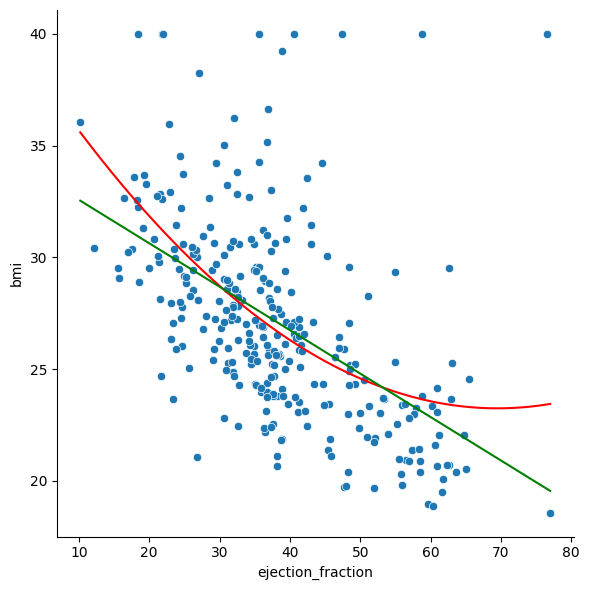

In [58]:
## TODO: plot the line fitted by this polinomial regression, compare to the simple regression on ef
X_plot = np.arange(np.min(X_train['ejection_fraction']),np.max(X_train['ejection_fraction']),0.1).reshape(-1,1)
X_plot_6 = polynomial2.transform(X_plot)

X_plot_6_scaled = X_plot_6
X_plot_6_scaled[:,1:] = scaler.transform(X_plot_6_scaled[:,1:])
y_plot_6 = results.predict(X_plot_6_scaled)

sns.relplot(y="bmi", x="ejection_fraction", palette="muted",
            height=6, data=df)
sns.lineplot(x=X_plot[:,0], y=y_plot_6,color='red')
sns.lineplot(x=X_plot[:,0], y=y_plot,color='green')

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef^2 + \beta_4 \cdot ef \cdot creatinine + \beta_5 \cdot creatinine^2 + \epsilon $$

In [60]:
variables = ['ejection_fraction', 'serum_creatinine']

X_train_7 = X_train[variables]
X_test_7 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_7 = polynomial2.fit_transform(X_train_7)
X_test_7 = polynomial2.fit_transform(X_test_7)

scaler = StandardScaler()

# Scale everything except the constant term (column index 0)
X_train_7[:, 1:] = scaler.fit_transform(X_train_7[:, 1:])
X_test_7[:, 1:] = scaler.transform(X_test_7[:, 1:])

# Convert to DataFrame, maintaining the column names
cols = polynomial2.get_feature_names_out()
X_train_7 = pd.DataFrame(X_train_7, columns=cols, index=train_index)
X_test_7 = pd.DataFrame(X_test_7, columns=cols, index=test_index)

In [61]:
model = sm.OLS(y_train, X_train_7)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.80e-85
Time:                        15:41:43   Log-Likelihood:                -496.43
No. Observations:                 239   AIC:                             1005.
Df Residuals:                     233   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [62]:
y_pred = results.predict(X_test_7)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_7.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6693
adj_R2: 0.6319
MSE: 4.9017


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef \cdot creatinine + \beta_4 \cdot creatinine^2 + \epsilon $$

In [63]:
X_train_8 = X_train_7.drop('ejection_fraction^2', axis=1)
X_test_8 = X_test_7.drop('ejection_fraction^2', axis=1)

In [64]:
model = sm.OLS(y_train, X_train_8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     271.7
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.11e-86
Time:                        15:41:52   Log-Likelihood:                -496.51
No. Observations:                 239   AIC:                             1003.
Df Residuals:                     234   BIC:                             1020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [65]:
y_pred = results.predict(X_test_8)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_8.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6688
adj_R2: 0.6382
MSE: 4.9087


## Categorical Features

To use them we need to transform categorical variables with one-hot encoding


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_feature = encoder.fit_transform(df[cat_vars])
df_encoded = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(cat_vars))
df_encoded = pd.concat([df.drop(cat_vars, axis=1), df_encoded], axis=1)
df_encoded

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,bmi,anaemia_1,diabetes_1,high_blood_pressure_1,sex_Male,smoking_1,DEATH_EVENT_True
0,75.00,582,20.73,265000.00,1.90,138.39,4,30.82,0.00,0.00,1.00,1.00,0.00,1.00
1,55.00,7861,29.02,263358.03,1.10,131.90,6,25.40,0.00,0.00,0.00,1.00,0.00,1.00
2,65.00,146,26.24,162000.00,1.30,143.66,7,29.45,0.00,0.00,0.00,1.00,1.00,1.00
3,50.00,111,10.21,210000.00,1.90,135.03,7,36.06,1.00,0.00,0.00,1.00,0.00,1.00
4,65.00,160,19.33,327000.00,2.70,136.08,8,33.69,1.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,61,38.05,155000.00,1.10,135.58,270,25.60,0.00,1.00,1.00,1.00,1.00,0.00
295,55.00,1820,35.20,270000.00,1.20,142.02,271,29.39,0.00,0.00,0.00,0.00,0.00,0.00
296,45.00,2060,62.32,742000.00,0.80,136.38,278,20.71,0.00,1.00,0.00,0.00,0.00,0.00
297,45.00,2413,37.49,140000.00,1.40,133.91,280,27.76,0.00,0.00,0.00,1.00,1.00,0.00


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot death+ \epsilon $$

In [67]:
num_variables = ['ejection_fraction']
cat_variables = ['DEATH_EVENT_True']

X_train_9_num = X_train[num_variables]
X_test_9_num = X_test[num_variables]

X_train_9_cat = df_encoded.loc[train_index, cat_variables]
X_test_9_cat = df_encoded.loc[test_index, cat_variables]


# Concatenate the polynomial features with the one-hot encoded categorical variable
X_train_9 = np.concatenate([X_train_9_num, X_train_9_cat], axis=1)
X_test_9 = np.concatenate([X_test_9_num, X_test_9_cat], axis=1)

cols = num_variables + cat_variables
X_train_9 = pd.DataFrame(X_train_9, index=train_index, columns=cols)
X_test_9 = pd.DataFrame(X_test_9, index=test_index, columns=cols)

X_train_9 = sm.add_constant(X_train_9)
X_test_9 = sm.add_constant(X_test_9)

In [68]:
model = sm.OLS(y_train, X_train_9)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     63.14
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.09e-22
Time:                        15:42:32   Log-Likelihood:                -652.12
No. Observations:                 239   AIC:                             1310.
Df Residuals:                     236   BIC:                             1321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                32.9851      0.86

<Axes: xlabel='ejection_fraction', ylabel='bmi'>

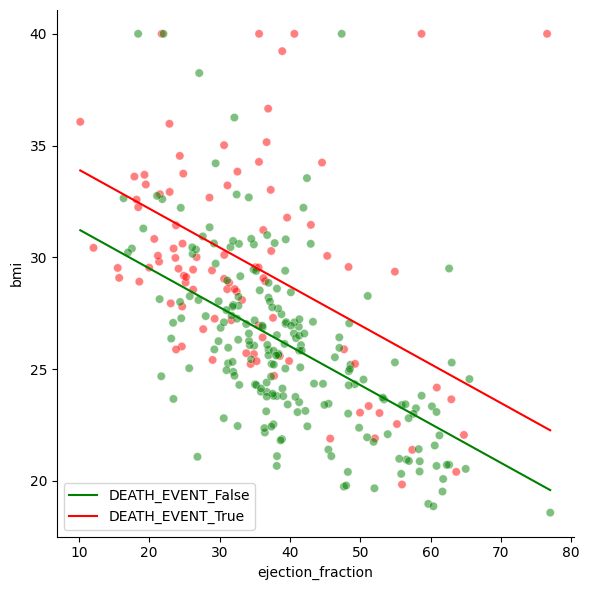

In [69]:
X_plot = np.arange(np.min(df['ejection_fraction']), np.max(df['ejection_fraction']), 0.1).reshape(-1, 1)
X_plot = sm.add_constant(X_plot)

# Create two versions of X_plot, one with the binary variable = 0, one with binary variable = 1
X_plot_0 = np.hstack([X_plot, np.zeros((X_plot.shape[0], 1))])  # Add column of 0's for binary_var = 0
X_plot_1 = np.hstack([X_plot, np.ones((X_plot.shape[0], 1))])   # Add column of 1's for binary_var = 1

y_plot_0 = results.predict(X_plot_0)  # Prediction for binary_var = 0
y_plot_1 = results.predict(X_plot_1)  # Prediction for binary_var = 1

sns.relplot(x="ejection_fraction", y="bmi", height=6, data=df, legend=False, hue='DEATH_EVENT', palette={0: 'green', 1: 'red'}, alpha=.5)

sns.lineplot(x=X_plot[:, 1], y=y_plot_0, color='green', label='DEATH_EVENT_False')
sns.lineplot(x=X_plot[:, 1], y=y_plot_1, color='red', label='DEATH_EVENT_True')

In [70]:
y_pred = results.predict(X_test_9)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_9.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.3593
adj_R2: 0.3250
MSE: 9.4958


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef \cdot creatinine + \beta_4 \cdot creatinine^2 + \beta_5 \cdot death+ \epsilon $$

In [71]:
num_variables = ['ejection_fraction', 'serum_creatinine']
cat_variables = ['DEATH_EVENT_True']

X_train_9_num = X_train[num_variables]
X_test_9_num = X_test[num_variables]

X_train_9_cat = df_encoded.loc[train_index, cat_variables]
X_test_9_cat = df_encoded.loc[test_index, cat_variables]

# Perform Polynomial Features transformation on the numerical data
polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_9_poly = polynomial2.fit_transform(X_train_9_num)
X_test_9_poly = polynomial2.fit_transform(X_test_9_num)

# Scale the polynomial features except for the bias (constant) term
scaler = StandardScaler()
X_train_9_poly[:, 1:] = scaler.fit_transform(X_train_9_poly[:, 1:])
X_test_9_poly[:, 1:] = scaler.transform(X_test_9_poly[:, 1:])

# Concatenate the polynomial features with the one-hot encoded categorical variable
X_train_9 = np.concatenate([X_train_9_poly, X_train_9_cat], axis=1)
X_test_9 = np.concatenate([X_test_9_poly, X_test_9_cat], axis=1)

# Convert to DataFrame for easier handling
cols_poly = polynomial2.get_feature_names_out(num_variables)
cols = np.concatenate([cols_poly, X_train_9_cat.columns])

X_train_9 = pd.DataFrame(X_train_9, columns=cols, index=train_index)
X_test_9 = pd.DataFrame(X_test_9, columns=cols, index=test_index)

X_train_9.drop('ejection_fraction^2', axis=1, inplace=True)
X_test_9.drop('ejection_fraction^2', axis=1, inplace=True)


In [72]:
model = sm.OLS(y_train, X_train_9)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.79e-85
Time:                        15:42:45   Log-Likelihood:                -496.43
No. Observations:                 239   AIC:                             1005.
Df Residuals:                     233   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [73]:
y_pred = results.predict(X_test_9)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_9.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6707
adj_R2: 0.6334
MSE: 4.8809


# Diagnostics

Let's check the assumptions of linear regression.

Assumptions:

1. There is a linear relationship between the predictors and the response
2. $\epsilon_i$ (residuals) are indipendent
3. $Var(\epsilon_i) = \sigma^2 \quad \forall i $ (homoschedasticity)

and for inference:

4. $\epsilon_i \sim N(0,\sigma^2) \quad \forall i$ (normality) --- or at least large $n$ (sample size)

Let's consider the model

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot \text{creatinine_phosphokinase} + \epsilon $$

In [74]:
variables = ['ejection_fraction', 'serum_creatinine', 'creatinine_phosphokinase']

X_train_5 = X_train[variables]
X_test_5 = X_test[variables]
X_train_5 = sm.add_constant(X_train_5)
X_test_5 = sm.add_constant(X_test_5)

In [75]:
model = sm.OLS(y_train, X_train_5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           3.16e-77
Time:                        15:42:56   Log-Likelihood:                -521.77
No. Observations:                 239   AIC:                             1052.
Df Residuals:                     235   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Independence

Results summary includes Durbin-Watson test. The values of its test statistics are between 0 and 4. Values near 2 indicates no autocorrelation (independence), smaller values indicate positive autocorrelation, higher values negative autocorrelation

In [76]:
from statsmodels.stats.stattools import durbin_watson

In [77]:
durbin_watson(results.resid)

np.float64(2.119393199637481)

## Linearity and Homoschedasticity

We can visually inspect the residuals to check both

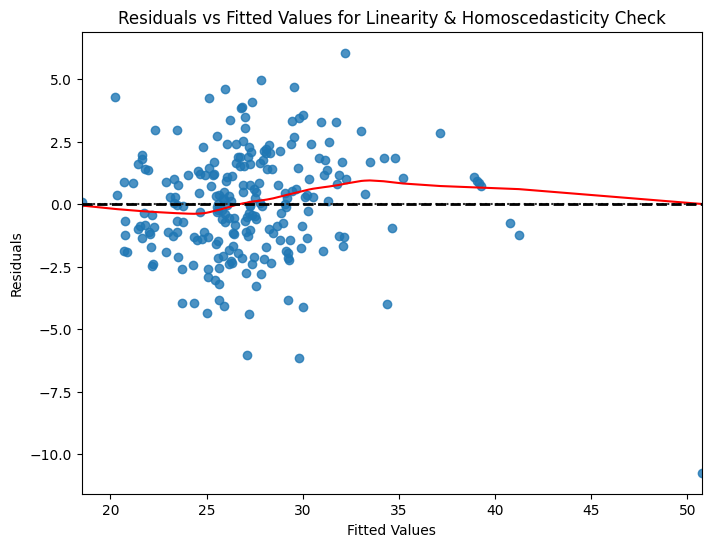

In [78]:
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1.5})  # Add a smooth trendline

plt.axhline(0, color='black', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linearity & Homoscedasticity Check')
plt.show()

Breusch-Pagan statistical test for homoschedascity.

*H0: residuals are homoschedastic*

In [79]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(results.resid, X_train_5)

print(f'p-value: {bp_test[1]}')

p-value: 1.6482512198890997e-06


## Gaussianity

Results summary includes the Jacques-Bera test for normality on residuals.

*H0: data are gaussian.*

This test has poor power for n < 100.

Other methods we previosly saw are the QQ-plot (graphical) and the Shapiro-Wilk test (good power for n < 2000)

In [80]:
print(f'Jacques-Bera test p-value: {results.diagn["jbpv"]:.4f}')

Jacques-Bera test p-value: 0.0000


In [81]:
sw = stats.shapiro(results.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.0009


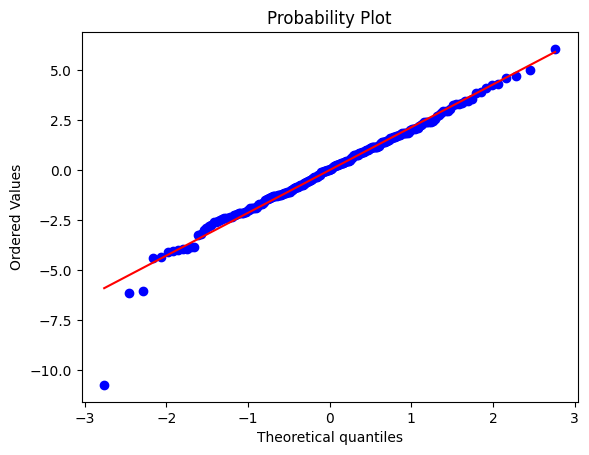

In [82]:
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

## Transform y

In [83]:
y_train_10 = np.sqrt(y_train)
y_test_10 = np.sqrt(y_test)

# y_train_10 = np.log(y_train + 1)
# y_test_10 = np.log(y_test + 1)

# y_train_10 = np.cbrt(y_train)
# y_test_10 = np.cbrt(y_test)

model = sm.OLS(y_train_10, X_train_5)
results_new = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           3.16e-77
Time:                        15:43:17   Log-Likelihood:                -521.77
No. Observations:                 239   AIC:                             1052.
Df Residuals:                     235   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
y_pred = results_new.predict(X_test_5)
r2 = r2_score(y_test_10,y_pred)
mse = mean_squared_error(y_test_10,y_pred)
n = len(y_test)
p = X_test_5.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6270
adj_R2: 0.5999
MSE: 0.0503


In [85]:
sw = stats.shapiro(results_new.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.0013


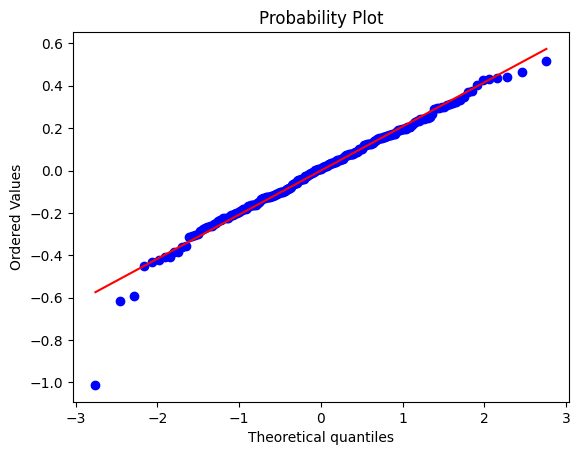

In [86]:
stats.probplot(results_new.resid, dist="norm", plot=plt)
plt.show()

## Leverages & outliers

**Outliers**: points with a very high residual (bad fit)
Residuals are standardized so to make it easier to spot outliers (those outside +- 2 or +- 3)

**Leverages**: points with unusual value

Hat Matrix $H$ s.t. $\hat{y}=Hy$

$H = X(X^TX)^{-1}X^T$

the leverage of point $i$ is $h_{ii} = x_i^T(X^TX)^{-1}x_i \in (0,1)$



**Cook's distanc**e: a mease of the point's overall influence of the model

$$
D_i = \frac{\epsilon_i^2}{k \cdot \sigma^2} \cdot \frac{h_{ii}}{(1-h_{ii})^2}
$$

comined the size of the (standardized) residuals, with respect to the model parameters, and the leverage

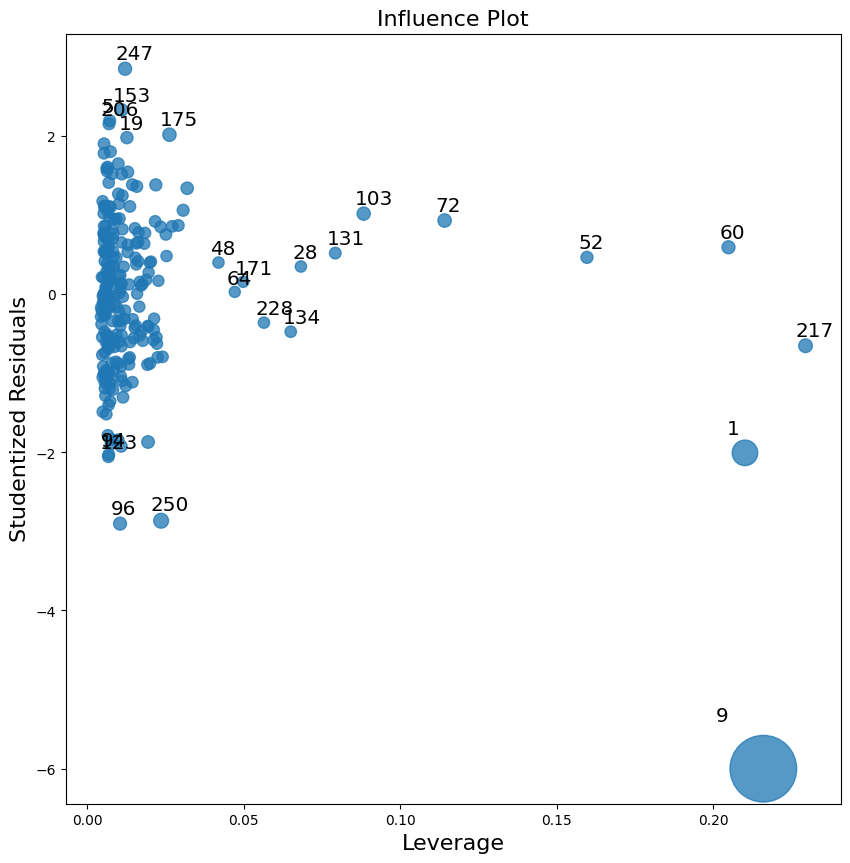

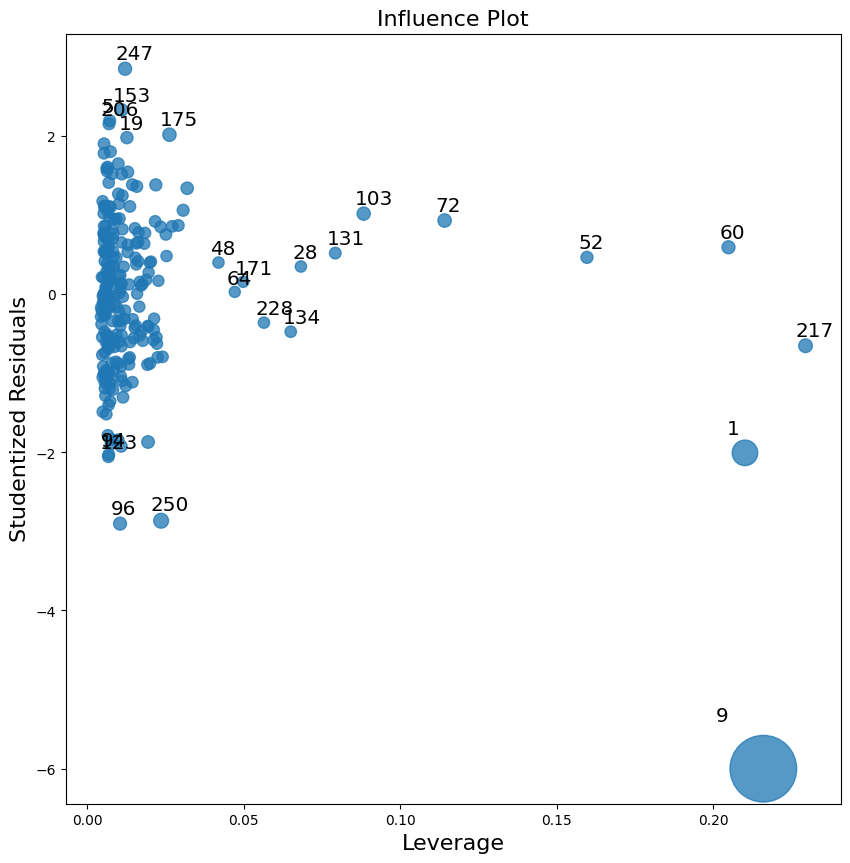

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.influence_plot(results, criterion="cooks", ax=ax)

In [88]:
influence = results.get_influence()

influence_df = influence.summary_frame()[['cooks_d', 'student_resid', 'hat_diag']]

influence_df = influence_df.rename(columns={'hat_diag': 'leverage'}).sort_values(by='cooks_d', ascending=False)

influence_df

,cooks_d,student_resid,leverage
9,2.16,-6.00,0.22
1,0.26,-2.01,0.21
250,0.05,-2.86,0.02
217,0.03,-0.65,0.23
72,0.03,0.93,0.11
...,...,...,...
37,0.00,0.01,0.01
135,0.00,0.02,0.01
246,0.00,0.01,0.02
214,0.00,-0.01,0.01


In [89]:
X_train_5.loc[9]

const                        1.00
ejection_fraction           35.63
serum_creatinine             9.40
creatinine_phosphokinase   123.00
Name: 9, dtype: float64

## Removing high leverage outliers

In [91]:
to_remove = [9]

X_train_11 = X_train_5.drop(to_remove)
y_train_11 = y_train.drop(to_remove)
X_test_11 = X_test_5
y_test_11 = y_test
model = sm.OLS(y_train_11, X_train_11)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     319.9
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.76e-82
Time:                        15:43:34   Log-Likelihood:                -503.04
No. Observations:                 238   AIC:                             1014.
Df Residuals:                     234   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
sw = stats.shapiro(results.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.9159


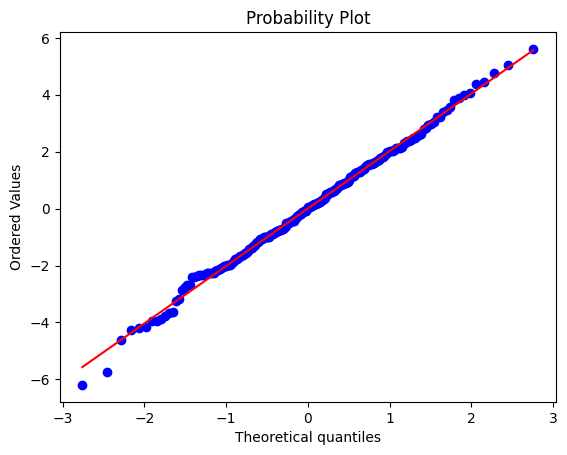

In [93]:
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

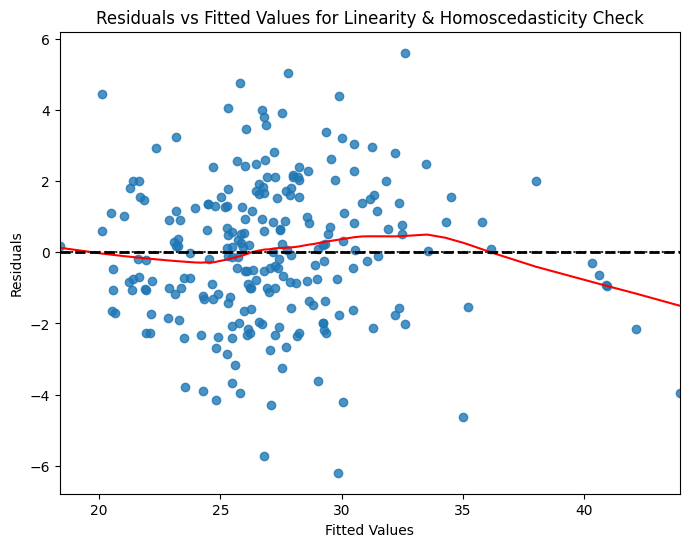

In [94]:
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1.5})  # Add a smooth trendline

plt.axhline(0, color='black', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linearity & Homoscedasticity Check')
plt.show()

In [95]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(results.resid, X_train_11)

print(f'p-value: {bp_test[1]}')

p-value: 0.45266279791912245


# Anscombe dataset

Four datasets with nearly identical:

* Mean of
𝑥
x and
𝑦
y

* Variance of
𝑥
x and
𝑦
y

* Correlation between
𝑥
x and
𝑦
y

* Regression line (𝑦 = 3.00 + 0.50𝑥 )

* $𝑅^2$
  and residual standard error

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the built-in Anscombe dataset
df = sns.load_dataset("anscombe")

# Prepare containers
datasets = ['I', 'II', 'III', 'IV']
models = {}

# Plot setup: 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Anscombe's Quartet: Regression & Residuals", fontsize=16)

for i, name in enumerate(datasets):
    data = df[df['dataset'] == name]

    x = data['x']
    y = data['y']
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    models[name] = model

    # Scatter plot with regression line (top row)
    ax1 = axes[0, i]
    ax1.scatter(x, y, color='blue')
    ax1.plot(x, model.predict(X), color='red')
    ax1.set_title(f'Dataset {i+1}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # Residual plot (bottom row)
    ax2 = axes[1, i]
    ax2.scatter(x, model.resid, color='#ff6600')
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.set_title(f'Residuals {i+1}')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

# Show all plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print regression summaries
for name, model in models.items():
    print(f"\n=== Summary for Dataset {name} ===")
    print(model.summary())


Dataset III
       x     y  leverage  cooks_distance  residuals  standard_resid
22 10.00  7.46      0.10            0.01      -0.54           -0.46
23  8.00  6.77      0.10            0.00      -0.23           -0.20
24 13.00 12.74      0.24            1.39       3.24            3.00
25  9.00  7.11      0.09            0.01      -0.39           -0.33
26 11.00  7.81      0.13            0.03      -0.69           -0.60
27 14.00  8.84      0.32            0.30      -1.16           -1.14
28  6.00  6.08      0.17            0.00       0.08            0.07
29  4.00  5.39      0.32            0.03       0.39            0.38
30 12.00  8.15      0.17            0.06      -0.85           -0.76
31  7.00  6.42      0.13            0.00      -0.08           -0.07
32  5.00  5.73      0.24            0.01       0.23            0.21


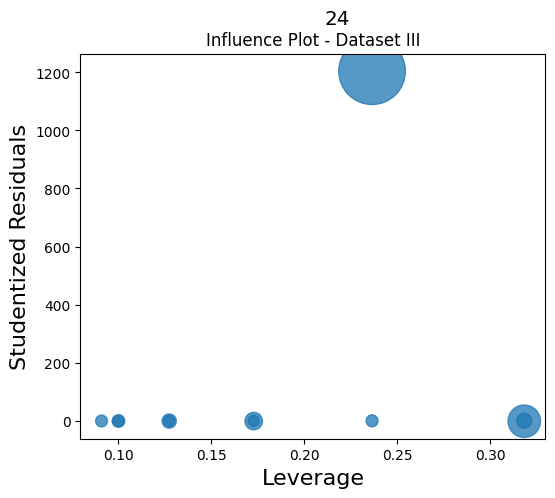

Dataset IV
       x     y  leverage  cooks_distance  residuals  standard_resid
33  8.00  6.58      0.10            0.01      -0.42           -0.36
34  8.00  5.76      0.10            0.06      -1.24           -1.06
35  8.00  7.71      0.10            0.02       0.71            0.60
36  8.00  8.84      0.10            0.14       1.84            1.57
37  8.00  8.47      0.10            0.09       1.47            1.25
38  8.00  7.04      0.10            0.00       0.04            0.03
39  8.00  5.25      0.10            0.12      -1.75           -1.49
40 19.00 12.50      1.00             NaN       0.00             NaN
41  8.00  5.56      0.10            0.08      -1.44           -1.23
42  8.00  7.91      0.10            0.03       0.91            0.78
43  8.00  6.89      0.10            0.00      -0.11           -0.10


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


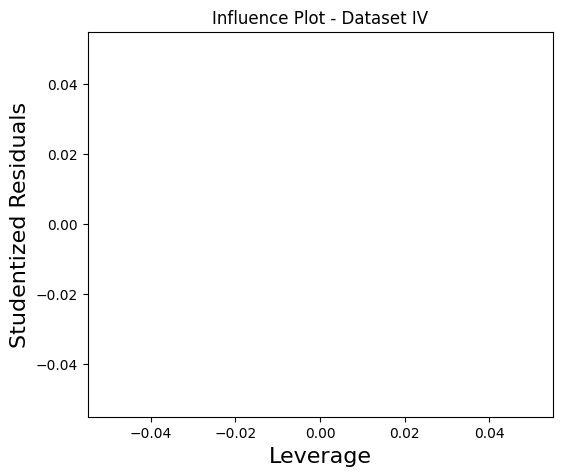

In [ ]:
## TODO: for datasets III and IV compute leverages and Cook distances
for dataset_label in ['III', 'IV']:
    print(f"Dataset {dataset_label}")

    # Filter data
    data = df[df['dataset'] == dataset_label]
    x = data['x']
    y = data['y']
    X = sm.add_constant(x)

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Get influence measures
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]  # [0] is Cook's D values, [1] are p-values

    # Create result DataFrame
    diagnostics_df = pd.DataFrame({
        'x': x,
        'y': y,
        'leverage': leverage,
        'cooks_distance': cooks_d,
        'residuals': model.resid,
        'standard_resid': influence.resid_studentized_internal
    }, index=data.index)

    print(diagnostics_df.round(3))

    # Influence plot
    fig, ax = plt.subplots(figsize=(6, 5))
    sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
    plt.title(f'Influence Plot - Dataset {dataset_label}')
    plt.show()

# Bias-variance tradeoff

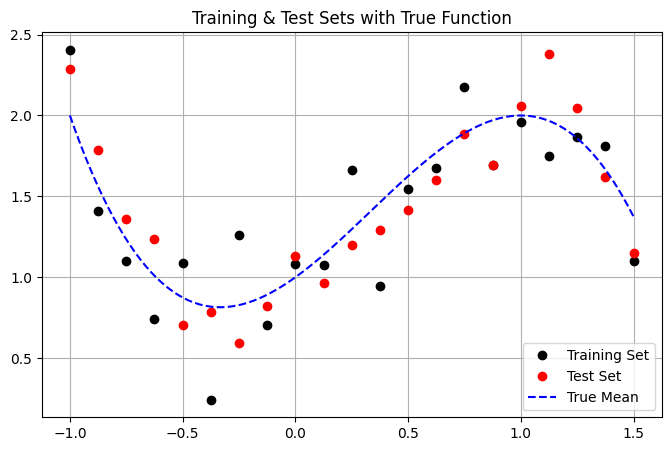

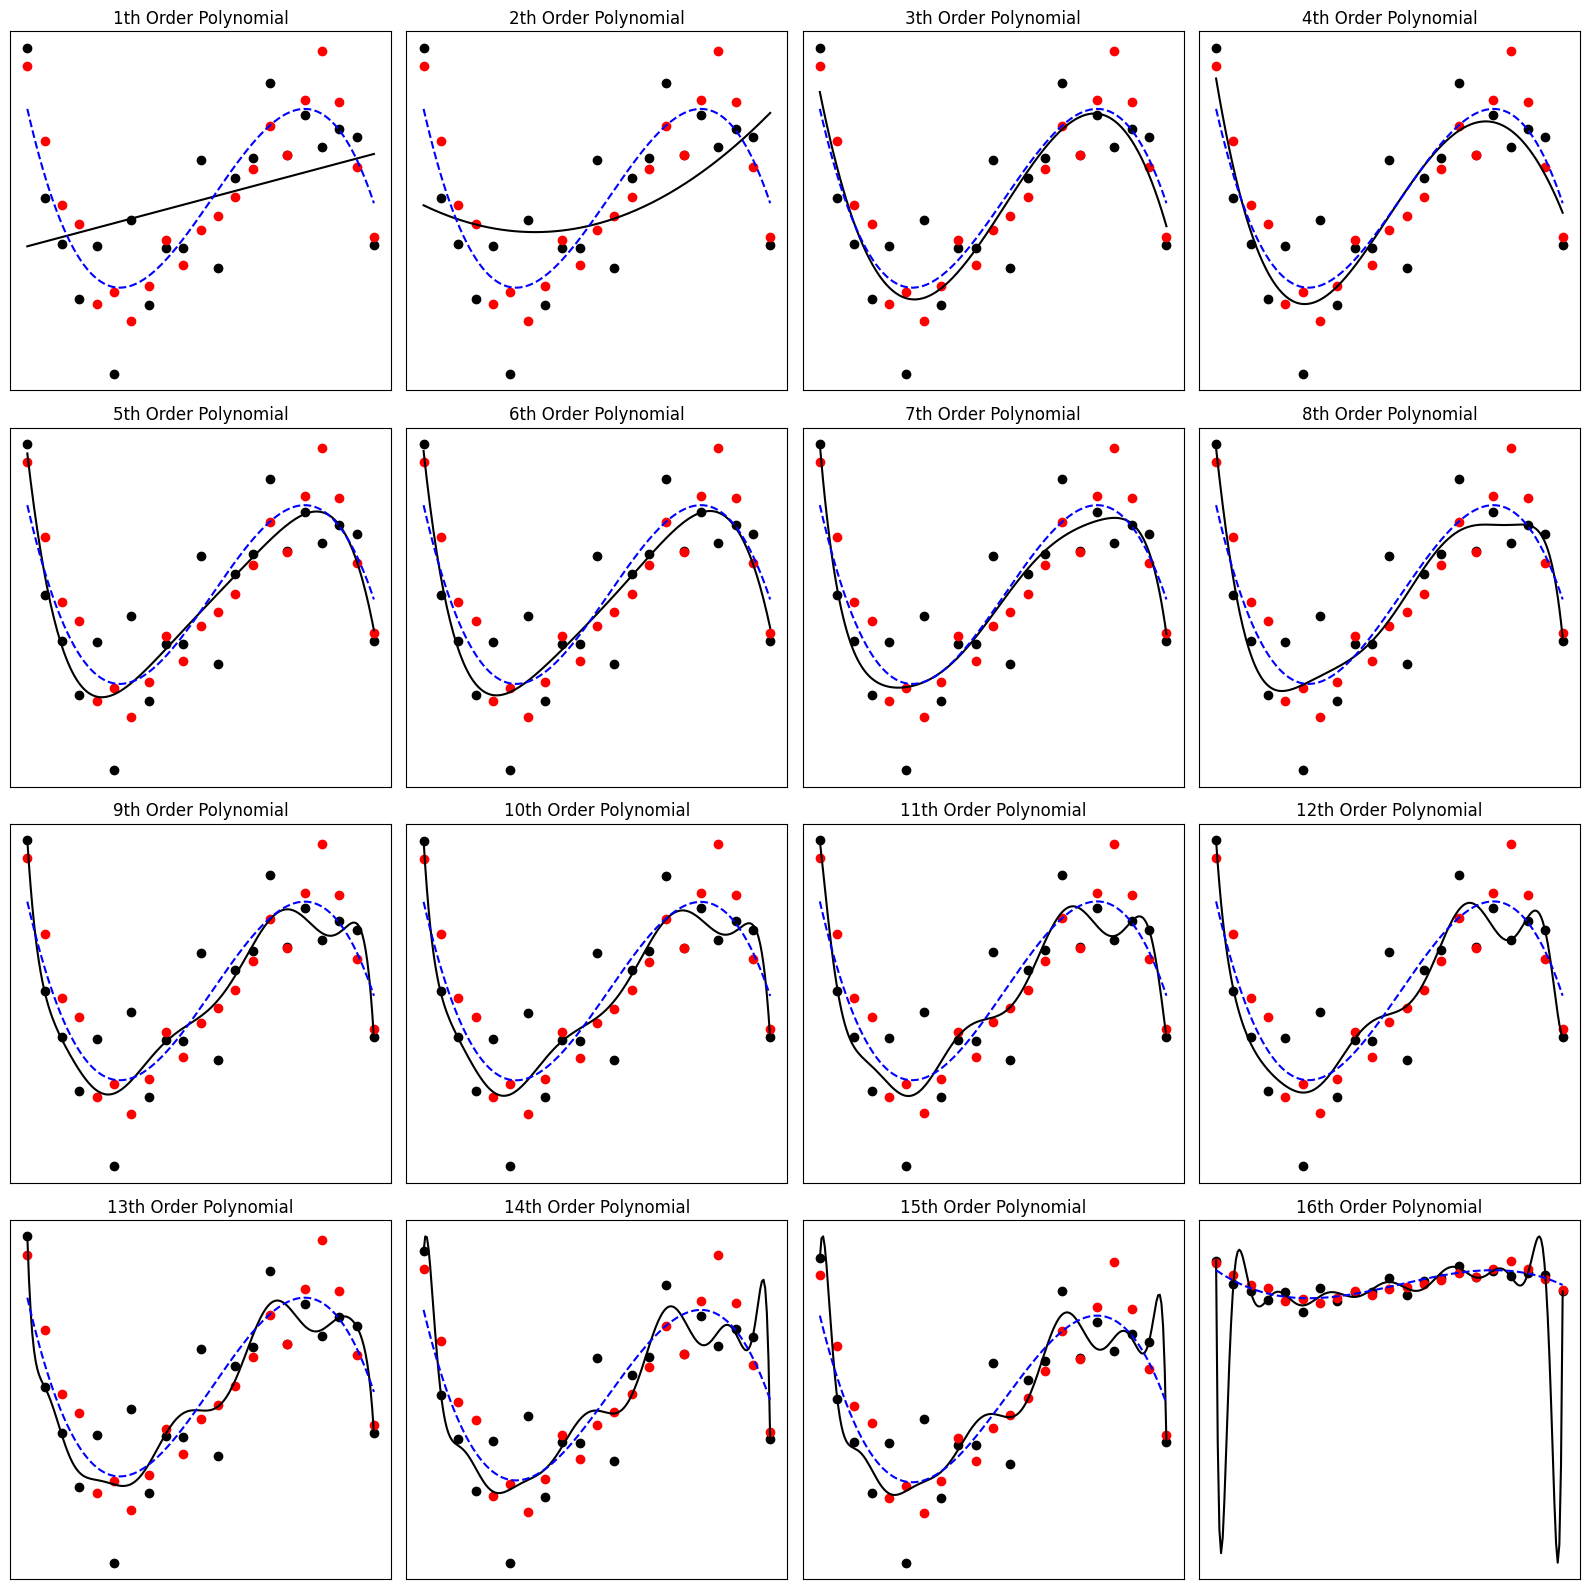

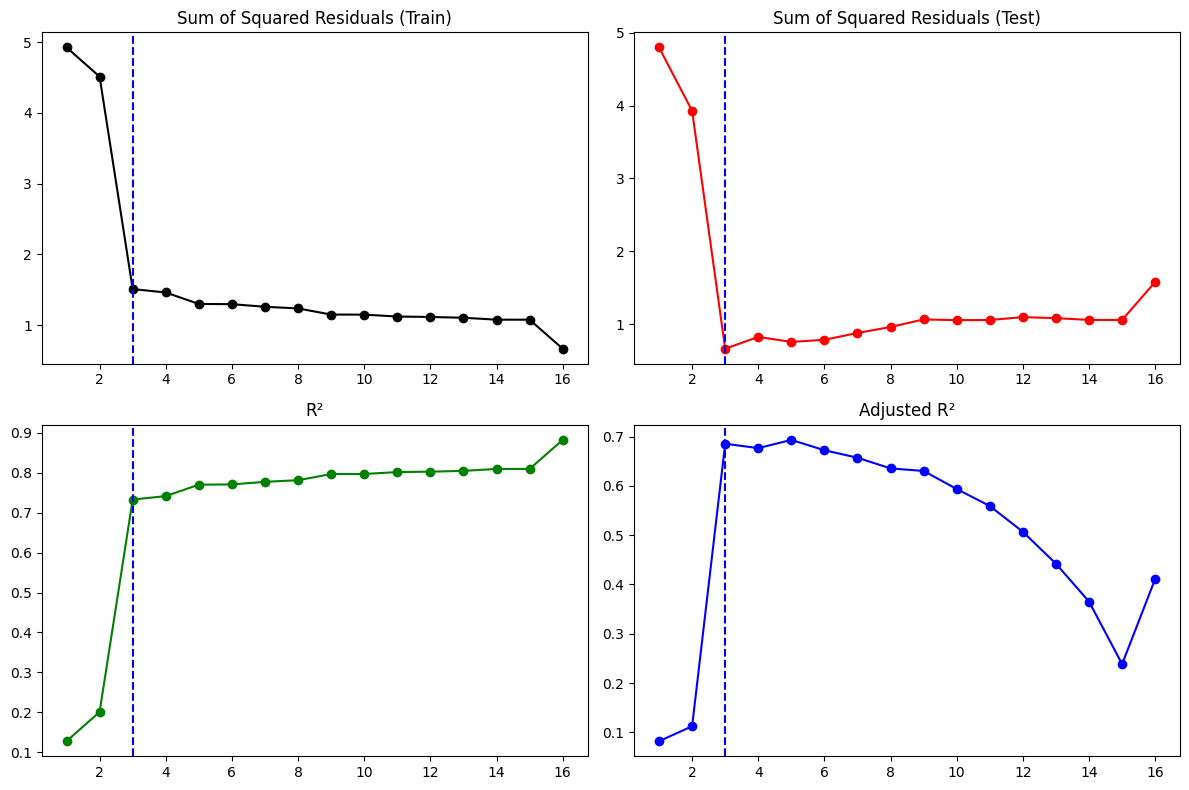

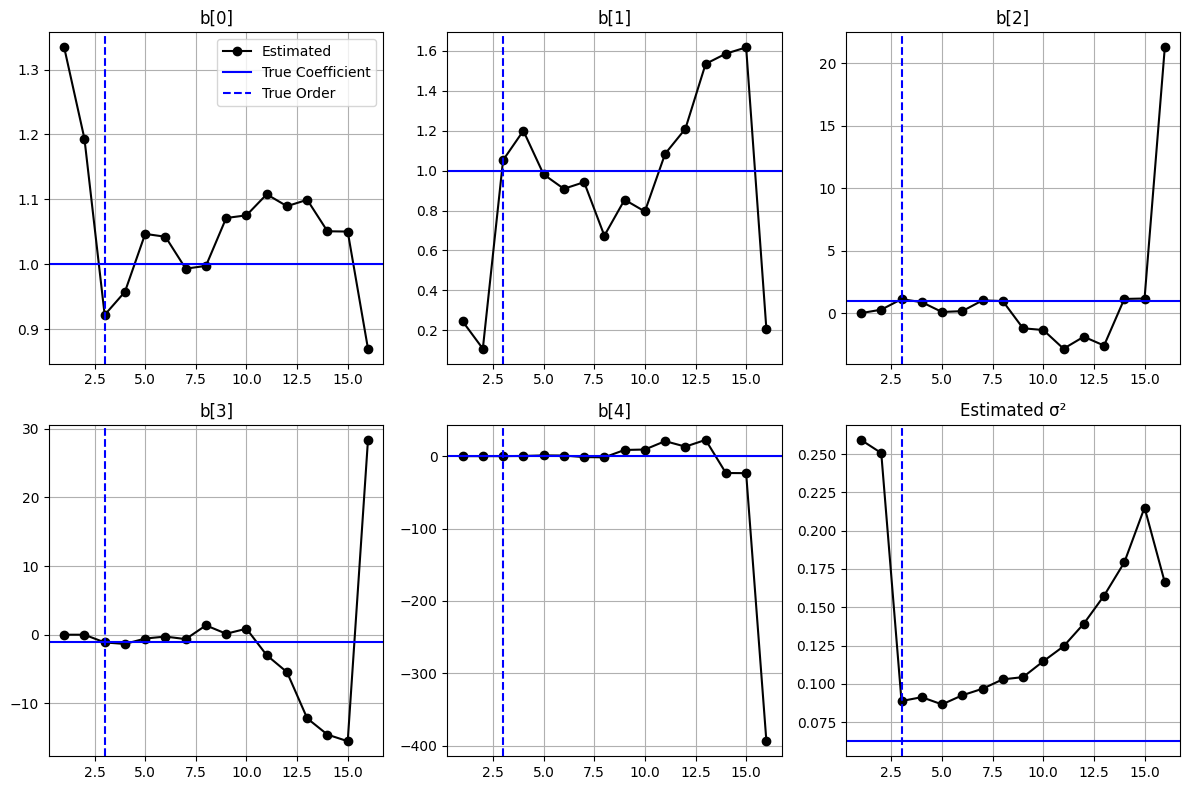

In [97]:
from sklearn.metrics import r2_score

np.random.seed(1)

# True model
def f(x): return 1 + x + x**2 - x**3
sigma = 0.25

# Generate data
x = np.linspace(-1, 1.5, 21)
y = f(x) + np.random.normal(0, sigma, size=x.shape)
y_new = f(x) + np.random.normal(0, sigma, size=x.shape)

# Build design matrix up to x^20
X = np.column_stack([x**p for p in range(21)])
X_df = pd.DataFrame(X, columns=[f'x{p}' for p in range(21)])

# Grid for plotting
x_plot = np.linspace(-1, 1.5, 210)
X_plot = np.column_stack([x_plot**p for p in range(21)])
X_plot_df = pd.DataFrame(X_plot, columns=[f'x{p}' for p in range(21)])

# Plot data with true curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ko', label='Training Set')
plt.plot(x, y_new, 'ro', label='Test Set')
plt.plot(x_plot, f(x_plot), 'b--', label='True Mean')
plt.legend(loc='lower right')
plt.title("Training & Test Sets with True Function")
plt.grid(True)
plt.show()

# Metrics to store
SSres, SSres_new, s2, R2, R2_adj, coeffs_all = [], [], [], [], [], []
n = len(x)

# Fit and plot polynomial models
plt.figure(figsize=(16, 16))
for p in range(1, 17):
    X_train_p = X_df.iloc[:, :p+1]
    X_plot_p = X_plot_df.iloc[:, :p+1]

    model = sm.OLS(y, X_train_p).fit()
    y_pred = model.predict(X_train_p)
    y_pred_new = model.predict(X_train_p)
    y_plot = model.predict(X_plot_p)

    # Plot the fit
    plt.subplot(4, 4, p)
    plt.plot(x, y, 'ko', label='Train')
    plt.plot(x, y_new, 'ro', label='Test')
    plt.plot(x_plot, y_plot, 'k-', label='Model')
    plt.plot(x_plot, f(x_plot), 'b--', label='True')
    plt.title(f'{p}th Order Polynomial')
    plt.xticks([]); plt.yticks([])

    # Store metrics
    res = y - y_pred
    res_new = y_new - y_pred_new
    SSres.append(np.sum(res**2))
    SSres_new.append(np.sum(res_new**2))
    s2.append(np.sum(res**2) / (n - (p + 1)))
    r2 = r2_score(y, y_pred)
    R2.append(r2)
    R2_adj.append(1 - (1 - r2) * (n - 1) / (n - p - 1))

    # Coefficients
    coeffs = np.zeros(17)
    coeffs[:p+1] = model.params
    coeffs_all.append(coeffs)

plt.tight_layout()
plt.show()

# Coefficients matrix
b = np.array(coeffs_all).T

# Compare model performance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(range(1, 17), SSres, 'ko-')
plt.axvline(3, color='blue', linestyle='--')
plt.title("Sum of Squared Residuals (Train)")

plt.subplot(2, 2, 2)
plt.plot(range(1, 17), SSres_new, 'ro-')
plt.axvline(3, color='blue', linestyle='--')
plt.title("Sum of Squared Residuals (Test)")

plt.subplot(2, 2, 3)
plt.plot(range(1, 17), R2, 'go-')
plt.axvline(3, color='blue', linestyle='--')
plt.title("R²")

plt.subplot(2, 2, 4)
plt.plot(range(1, 17), R2_adj, 'bo-')
plt.axvline(3, color='blue', linestyle='--')
plt.title("Adjusted R²")

plt.tight_layout()
plt.show()

# Compare coefficients
b_true = np.array([1, 1, 1, -1] + [0]*13)
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.plot(range(1, 17), b[i], 'ko-')
    plt.axhline(b_true[i], color='blue')
    plt.axvline(3, color='blue', linestyle='--')
    plt.title(f'b[{i}]')
    plt.grid(True)
    if i == 0:
        plt.legend(['Estimated', 'True Coefficient', 'True Order'])

# Plot estimated variance
plt.subplot(2, 3, 6)
plt.plot(range(1, 17), s2, 'ko-')
plt.axhline(sigma**2, color='blue')
plt.axvline(3, color='blue', linestyle='--')
plt.title("Estimated σ²")
plt.grid(True)

plt.tight_layout()
plt.show()
